In [10]:
import matplotlib.pyplot as plt
def plot_behaviers(file_name):
    # plot actions
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))  
    return action_values
    

In [2]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.figure(figsize=(20,8))
    plt.plot(Rewards)

#### 奖励函数
```
reward=0
        
        if pose.position.z < self.target_z:
            """飞行方向惩罚"""
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
        elif pose.position.z > self.target_z:
            """高度偏离惩罚"""
            reward+=-abs(self.target_z-pose.position.z)*10
        
        """高度目标奖励"""
        if timestamp > 1: 
            if abs(pose.position.z-self.target_z) < 0.3:
                self.target_hit+=1
                reward+=10*(self.target_hit)**2
                
           
        """阶段结束条件"""
        if pose.position.z > self.height_limit:
            reward-=1300
            done=True
        if timestamp > self.max_duration:
            done=True
```  
#### DDPG模型  
* <div style="color:red"> states取4维  [z,ox,oy,oz]</div>
* soft update 参数 0.001
* gamma 0.99
* Memory   按优先级存储/取样
   * 容量 1000
   * 一次取样量 100
   
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(400-300)
   * 激活函数 relu
   * 批归一化
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（400-300）+ actions:300

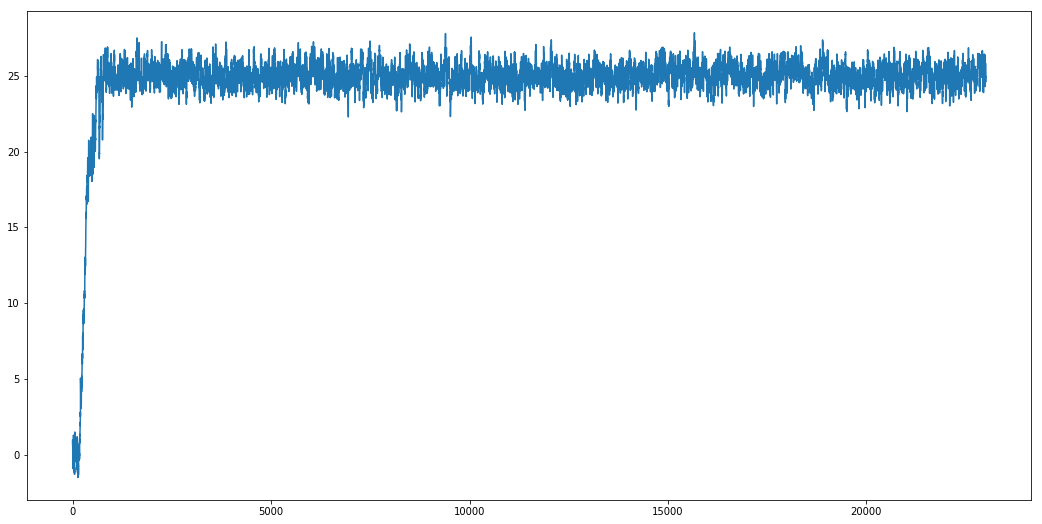

In [20]:
plot_behaviers("actions_01.txt")

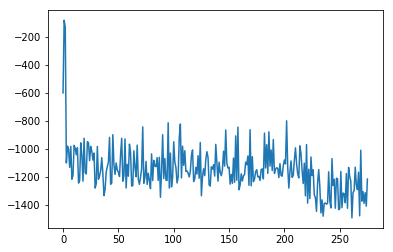

In [9]:
plot_rewards("rewards_01.txt")

* Actor激活函数改成 tanh  
Trial 01

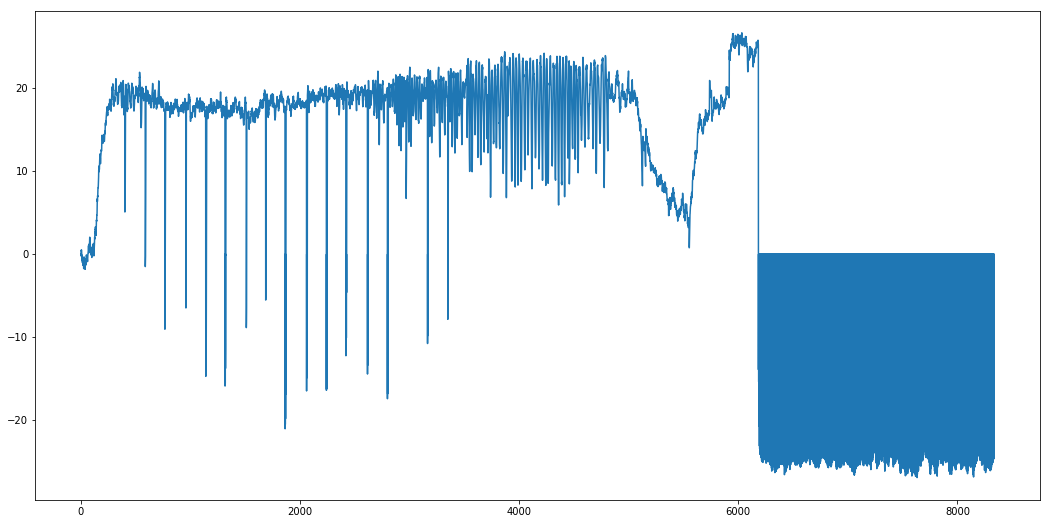

In [24]:
plot_behaviers("actions_02.txt")

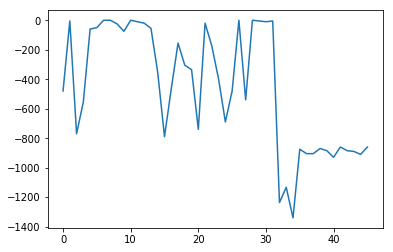

In [25]:
plot_rewards("rewards_02.txt")

* Actor 激活函数改成：relu + tanh  
Trail 02

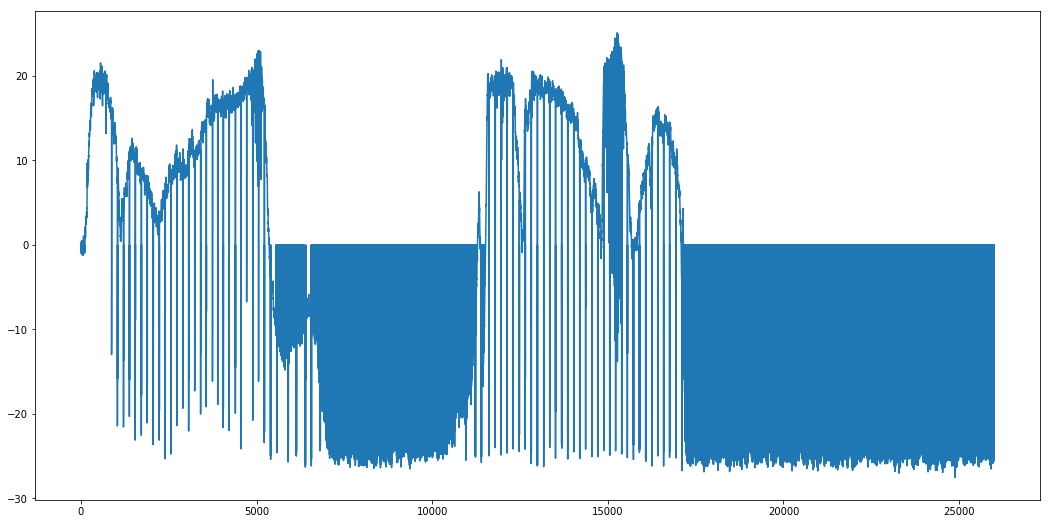

In [26]:
plot_behaviers("actions_03.txt")

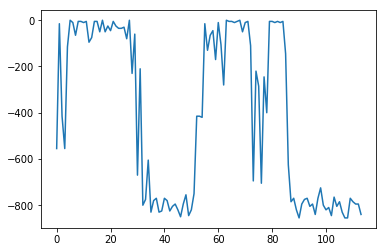

In [27]:
plot_rewards("rewards_03.txt")

* gamma 调低到0.9

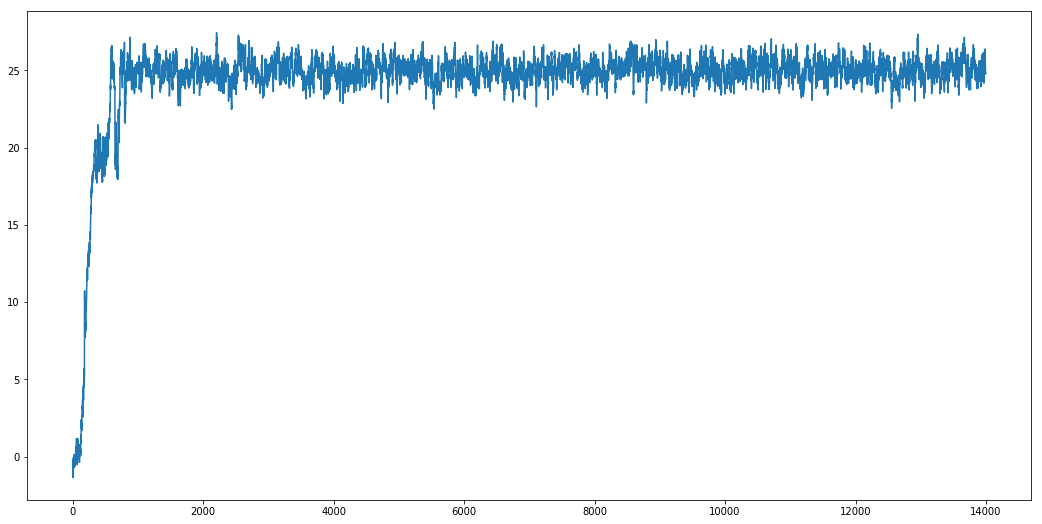

In [28]:
plot_behaviers("actions_04.txt")

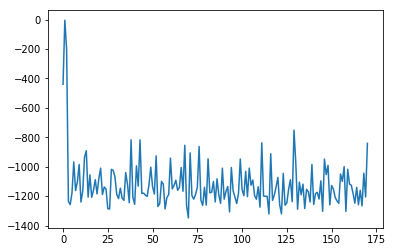

In [29]:
plot_rewards("rewards_04.txt")

* gamma 调回0.99 
* actor加正则化（两层都加，10-5）

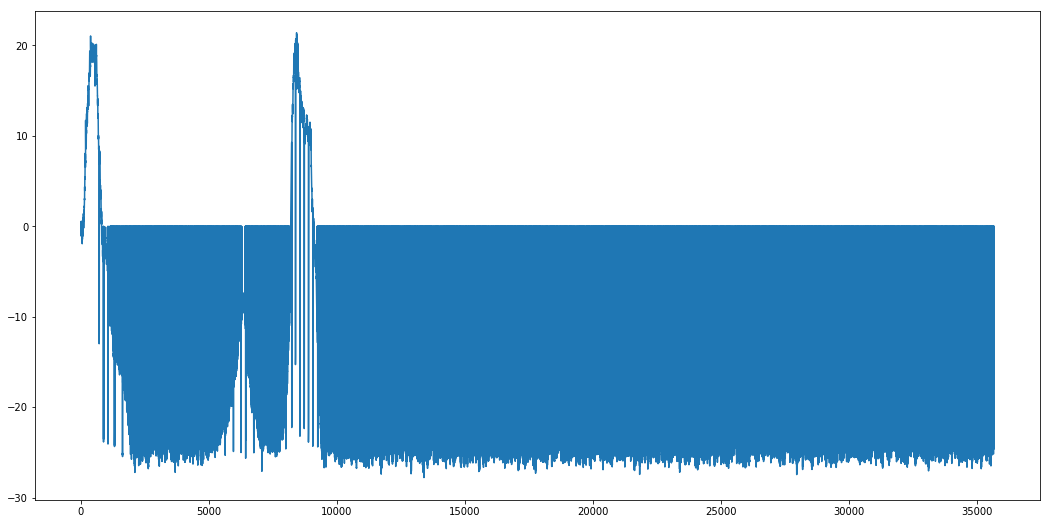

In [32]:
plot_behaviers("actions_05.txt")

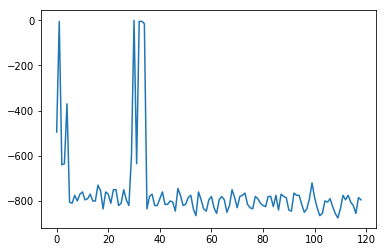

In [31]:
plot_rewards("rewards_05.txt")

* gamma 调低到 0.9
* Actor正则化率调到 10-6

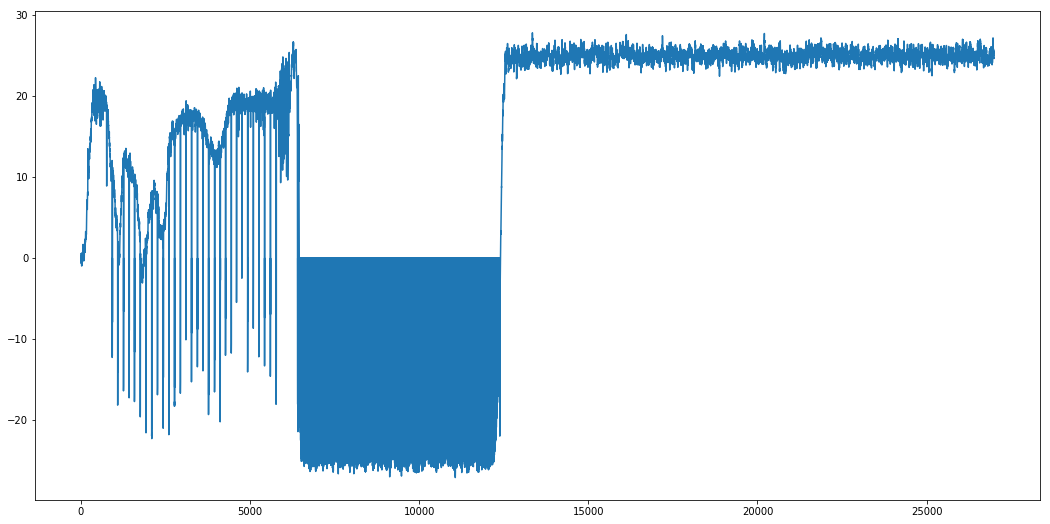

In [34]:
plot_behaviers("actions_06.txt")

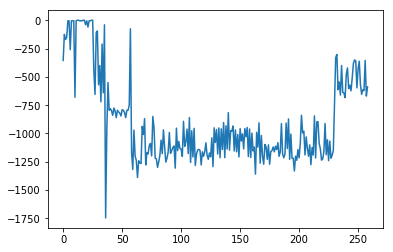

In [36]:
plot_rewards("rewards_06.txt")

* memory 容量改为 5000
* gamma 改回0.99
* Actor 正则化率保持 10-6

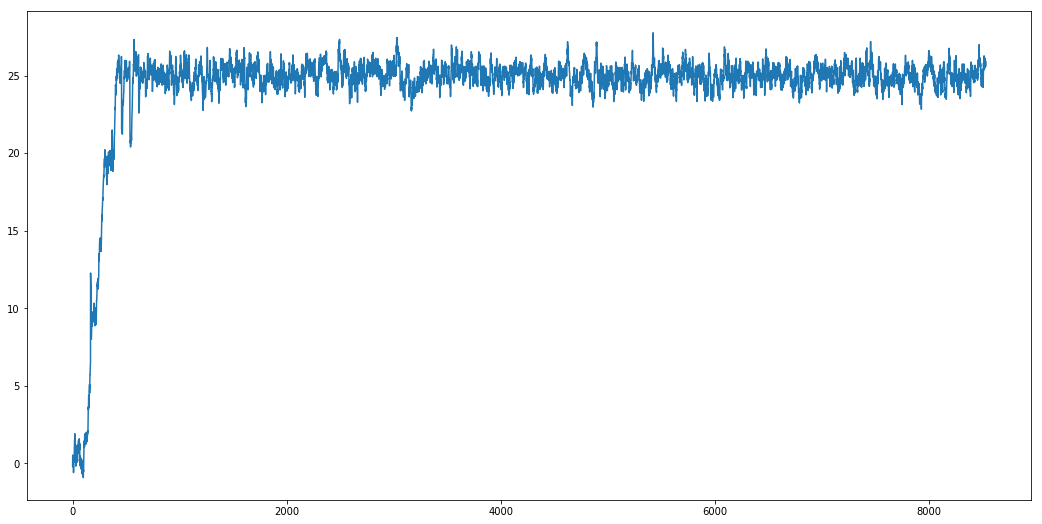

In [37]:
plot_behaviers("actions_07.txt")

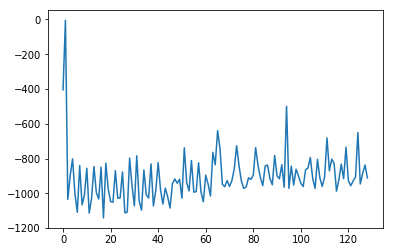

In [38]:
plot_rewards("rewards_07.txt")

* Actor去掉第一个hidden层的正则化（第二层的保留）
* Memory容量和gamma值都不变

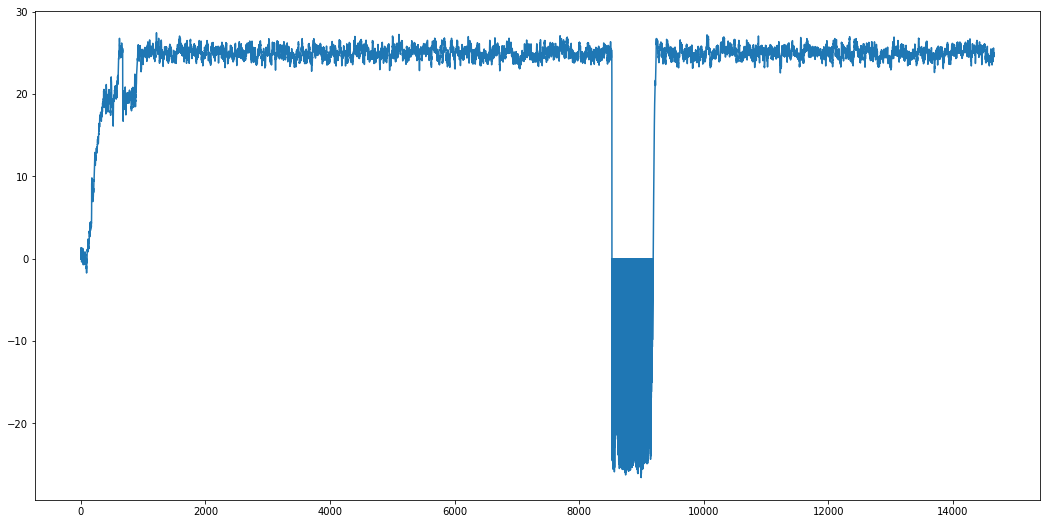

In [39]:
plot_behaviers("actions_08.txt")

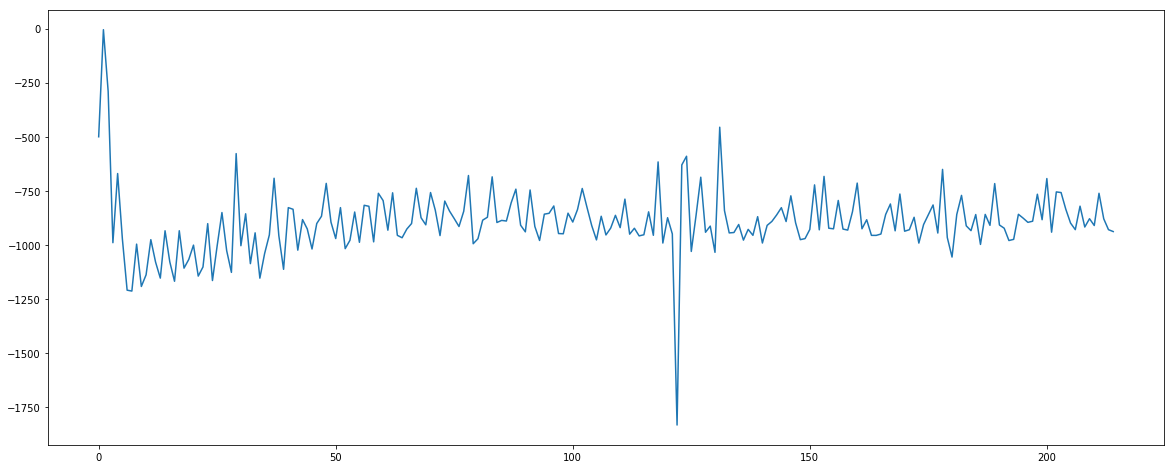

In [6]:
plot_rewards("rewards_08.txt")

* Memory 容量改成2000
* Actor正则化全部去除  
* 运行时间：2h

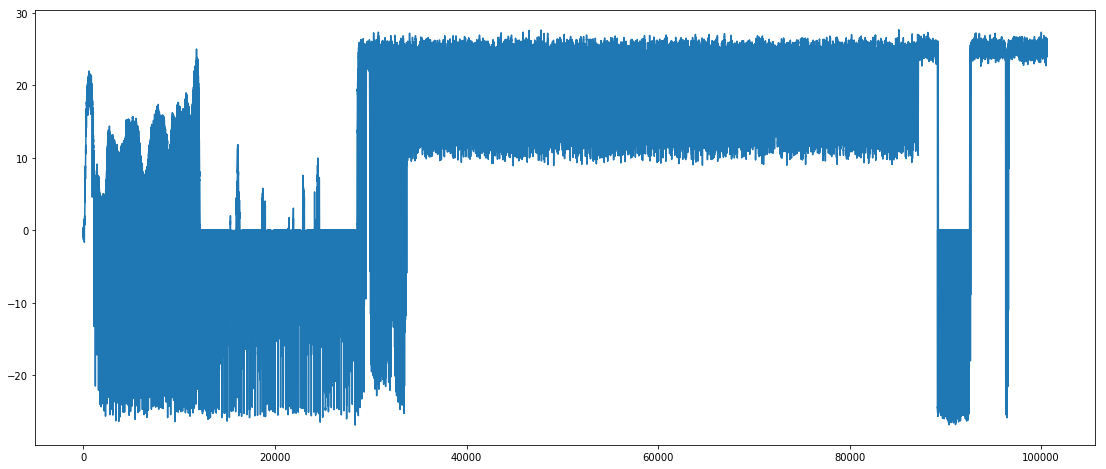

In [21]:
action_values=plot_behaviers("actions_09.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)
#plt.xlim(right=55000,left=50000)
#plt.ylim(bottom=0,top=30)


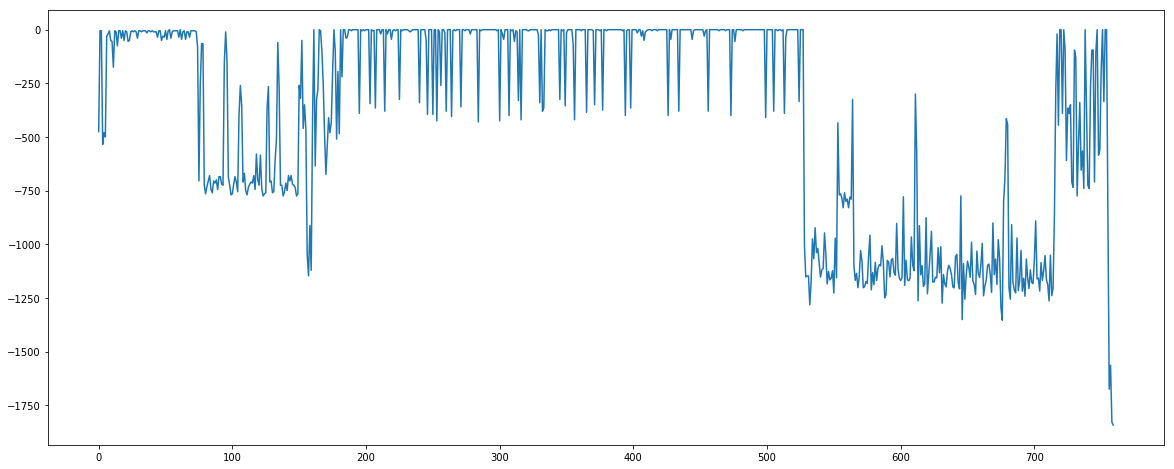

In [47]:
plot_rewards("rewards_09.txt")

* 去掉一层dropout，保留中间层